In [1]:
# -*- encoding:utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
import seaborn as sb
from time import time

In [2]:
raw_data = pd.read_csv('train.csv', header=0, encoding='utf-8')

In [3]:
raw_data.head()

,_id,article_link_list,article_mall,article_referrals,article_date_full,article_price,article_worthy,data_from,article_is_sold_out,article_id,...,article_channel_class,article_url,article_channel_id,article_channel_note,article_date,article_title,article_collection,article_link_domain,price,action
0,6736692,?,京东,?,2016-12-12 00:09:00,3999元起,167,api,0,6736692,...,z-tag-guonei,http://www.smzdm.com/p/6736692/,3,?,2016-12-12 00:09,MI 小米 MIX 全面屏概念手机,79,jd.com,3999.0,view
1,6733525,?,京东,予行与行,2016-12-10 17:14:00,49元包邮（双重优惠）,63,api,0,6733525,...,z-tag-guonei,http://www.smzdm.com/p/6733525/,3,?,2016-12-10 17:14,明珠 熟鱼片 100g*6件,62,jd.com,49.0,buy
2,6731029,?,天猫精选,?,2016-12-10 11:44:00,1829元包邮（99元定金，12.12付尾款，需用券）,409,api,0,6731029,...,z-tag-guonei,http://www.smzdm.com/p/6731029/,3,?,2016-12-10 11:44,双12预售：kai 贝印 shun旬刀纪念套刀（旬Classic中华菜刀DM-0712+水果...,121,tmall.com,1829.0,dislike
3,6731102,?,美国亚马逊,No2水晶,2016-12-09 20:22:00,$129.99+$21.15含税直邮（约￥1037）,36,api,0,6731102,...,z-tag-haitao,http://www.smzdm.com/p/6731102/,3,?,2016-12-09 20:22,SAMSUNG 三星 Gear Fit 2 智能手环,29,amazon.com,1037.0,dislike
4,6730703,?,京东,水的颜色,2016-12-09 19:10:00,3890元包邮（3990-100）,30,api,0,6730703,...,z-tag-guonei,http://www.smzdm.com/p/6730703/,3,?,2016-12-09 19:10,Delonghi 德龙 ESAM2200.S 全自动咖啡机,37,jd.com,3890.0,dislike


In [4]:
raw_data.replace(['?'], [None], inplace=True)# weka-like-csv用'?'代表缺失数据，还原回none
raw_data.dropna(how='all', axis=1, inplace=True)  # drop columns which all the items are none
raw_data.drop(labels=['_id', 'article_id', 'article_referrals', 'article_url', 'article_price', 'article_link',
                      'article_mall_url', 'article_date', 'article_channel_class', 'taobao_url', 'article_channel_note',
                      'article_stock_note', 'article_link_name', 'link_nofollow'],
              axis=1, inplace=True)  # drop some columns

In [5]:
raw_data.head()

,article_mall,article_date_full,article_worthy,data_from,article_is_sold_out,article_channel,article_comment,article_unworthy,article_author,article_item_title_mode,...,top_category,create_date,article_channel_url,article_is_timeout,article_channel_id,article_title,article_collection,article_link_domain,price,action
0,京东,2016-12-12 00:09:00,167,api,0,国内,209,624,761,0,...,电脑数码,2017-01-22 03:39:55,http://www.smzdm.com/youhui/,0,3,MI 小米 MIX 全面屏概念手机,79,jd.com,3999.0,view
1,京东,2016-12-10 17:14:00,63,api,0,国内,96,9,729,0,...,食品保健,2017-01-22 03:40:37,http://www.smzdm.com/youhui/,0,3,明珠 熟鱼片 100g*6件,62,jd.com,49.0,buy
2,天猫精选,2016-12-10 11:44:00,409,api,0,国内,165,10,870,0,...,日用百货,2017-01-22 03:40:50,http://www.smzdm.com/youhui/,0,3,双12预售：kai 贝印 shun旬刀纪念套刀（旬Classic中华菜刀DM-0712+水果...,121,tmall.com,1829.0,dislike
3,美国亚马逊,2016-12-09 20:22:00,36,api,0,海淘,65,108,731,0,...,电脑数码,2017-01-22 03:41:03,http://haitao.smzdm.com/,0,3,SAMSUNG 三星 Gear Fit 2 智能手环,29,amazon.com,1037.0,dislike
4,京东,2016-12-09 19:10:00,30,api,0,国内,29,11,293,0,...,家用电器,2017-01-22 03:41:10,http://www.smzdm.com/youhui/,0,3,Delonghi 德龙 ESAM2200.S 全自动咖啡机,37,jd.com,3890.0,dislike


In [6]:
raw_data['action'].replace(to_replace=dict(buy=2, view=1, dislike=0), inplace=True)
raw_data['article_worthy'].replace({None: 0}, inplace=True)
raw_data = raw_data.fillna(0)

In [7]:
raw_data.head()

,article_mall,article_date_full,article_worthy,data_from,article_is_sold_out,article_channel,article_comment,article_unworthy,article_author,article_item_title_mode,...,top_category,create_date,article_channel_url,article_is_timeout,article_channel_id,article_title,article_collection,article_link_domain,price,action
0,京东,2016-12-12 00:09:00,167,api,0,国内,209,624,761,0,...,电脑数码,2017-01-22 03:39:55,http://www.smzdm.com/youhui/,0,3,MI 小米 MIX 全面屏概念手机,79,jd.com,3999.0,1
1,京东,2016-12-10 17:14:00,63,api,0,国内,96,9,729,0,...,食品保健,2017-01-22 03:40:37,http://www.smzdm.com/youhui/,0,3,明珠 熟鱼片 100g*6件,62,jd.com,49.0,2
2,天猫精选,2016-12-10 11:44:00,409,api,0,国内,165,10,870,0,...,日用百货,2017-01-22 03:40:50,http://www.smzdm.com/youhui/,0,3,双12预售：kai 贝印 shun旬刀纪念套刀（旬Classic中华菜刀DM-0712+水果...,121,tmall.com,1829.0,0
3,美国亚马逊,2016-12-09 20:22:00,36,api,0,海淘,65,108,731,0,...,电脑数码,2017-01-22 03:41:03,http://haitao.smzdm.com/,0,3,SAMSUNG 三星 Gear Fit 2 智能手环,29,amazon.com,1037.0,0
4,京东,2016-12-09 19:10:00,30,api,0,国内,29,11,293,0,...,家用电器,2017-01-22 03:41:10,http://www.smzdm.com/youhui/,0,3,Delonghi 德龙 ESAM2200.S 全自动咖啡机,37,jd.com,3890.0,0


In [8]:
raw_data.dtypes

article_mall                object
article_date_full           object
article_worthy              object
data_from                   object
article_is_sold_out         object
article_channel             object
article_comment              int64
article_unworthy            object
article_author               int64
article_item_title_mode     object
timesort                     int64
top_category                object
create_date                 object
article_channel_url         object
article_is_timeout          object
article_channel_id           int64
article_title               object
article_collection           int64
article_link_domain         object
price                      float64
action                       int64
dtype: object

In [9]:
raw_data[['article_worthy', 'article_is_sold_out', 'article_unworthy', 'article_item_title_mode', 'article_is_timeout']] = \
    raw_data[['article_worthy', 'article_is_sold_out', 'article_unworthy', 'article_item_title_mode', 'article_is_timeout']].apply(pd.to_numeric, errors='coerce')
raw_data[['article_date_full', 'create_date']] = \
    raw_data[['article_date_full', 'create_date']].apply(pd.to_datetime, errors='ignore').astype(int64)

In [10]:
raw_data.dtypes

article_mall                object
article_date_full            int64
article_worthy               int64
data_from                   object
article_is_sold_out          int64
article_channel             object
article_comment              int64
article_unworthy             int64
article_author               int64
article_item_title_mode      int64
timesort                     int64
top_category                object
create_date                  int64
article_channel_url         object
article_is_timeout           int64
article_channel_id           int64
article_title               object
article_collection           int64
article_link_domain         object
price                      float64
action                       int64
dtype: object

## deal with label data

In [11]:
raw_data[['article_mall']].describe()

,article_mall
count,265
unique,44
top,京东
freq,113


In [12]:
def array2dict(arr):
    return {item: index for index, item in enumerate(set(arr.reshape((len(arr),))))}

converted = raw_data['article_mall'].replace(to_replace=array2dict(raw_data[['article_mall']].values), inplace=False)
converted

0       9
1       9
2      23
3      16
4       9
5       9
6       9
7      41
8      35
9       9
10      9
11     37
12      9
13      9
14      9
15      9
16      9
17     23
18     23
19     23
20     23
21     23
22     23
23      9
24      9
25     23
26      9
27      9
28      5
29     31
       ..
235     9
236    40
237    31
238    40
239     9
240    40
241    40
242     9
243     9
244     9
245     9
246    24
247     9
248    33
249     9
250     9
251     9
252     9
253     9
254    30
255    16
256     1
257     9
258    40
259    40
260     9
261    14
262    41
263    43
264     9
Name: article_mall, Length: 265, dtype: int64

In [14]:
converted.describe()

count    265.000000
mean      18.584906
std       12.359259
min        1.000000
25%        9.000000
50%        9.000000
75%       27.000000
max       43.000000
Name: article_mall, dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
raw_data['article_mall'] = encoder.fit_transform(raw_data['article_mall'].astype(str))
raw_data['article_link_domain'] = encoder.fit_transform(raw_data['article_link_domain'])
raw_data['top_category'] = encoder.fit_transform(raw_data['top_category'])
raw_data['article_channel'] = encoder.fit_transform(raw_data['article_channel'])
raw_data['data_from'] = encoder.fit_transform(raw_data['data_from'])
raw_data['article_channel_url'] = encoder.fit_transform(raw_data['article_channel_url'])

raw_data.dtypes

article_mall                 int64
article_date_full            int64
article_worthy               int64
data_from                    int64
article_is_sold_out          int64
article_channel              int64
article_comment              int64
article_unworthy             int64
article_author               int64
article_item_title_mode      int64
timesort                     int64
top_category                 int64
create_date                  int64
article_channel_url          int64
article_is_timeout           int64
article_channel_id           int64
article_title               object
article_collection           int64
article_link_domain          int64
price                      float64
action                       int64
dtype: object

In [16]:
raw_data['create_date']

0      1485056395000000000
1      1485056437000000000
2      1485056450000000000
3      1485056463000000000
4      1485056470000000000
5      1485057006000000000
6      1485057089000000000
7      1485057089000000000
8      1485057089000000000
9      1485057115000000000
10     1485057182000000000
11     1485057206000000000
12     1485057309000000000
13     1485058429000000000
14     1485058429000000000
15     1485058429000000000
16     1485058429000000000
17     1485058442000000000
18     1485058502000000000
19     1485058523000000000
20     1485058542000000000
21     1485058681000000000
22     1485058684000000000
23     1485058686000000000
24     1485058690000000000
25     1485058698000000000
26     1485058705000000000
27     1485058705000000000
28     1485223885000000000
29     1486204983000000000
              ...         
235    1486465573000000000
236    1486465578000000000
237    1486465583000000000
238    1486465595000000000
239    1486465603000000000
240    1486465610000000000
2

In [17]:
from sklearn.preprocessing import StandardScaler
raw_data['article_date_full'] = StandardScaler().fit_transform(raw_data['article_date_full'].values.reshape(-1, 1))
raw_data['create_date'] = StandardScaler().fit_transform(raw_data['create_date'].values.reshape(-1, 1))
raw_data['timesort'] = StandardScaler().fit_transform(raw_data['timesort'].values.reshape(-1, 1))

/Users/dd/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [27]:
raw_data['create_date']

0     -1.312100
1     -1.312060
2     -1.312048
3     -1.312035
4     -1.312029
5     -1.311519
6     -1.311440
7     -1.311440
8     -1.311440
9     -1.311415
10    -1.311351
11    -1.311329
12    -1.311231
13    -1.310166
14    -1.310166
15    -1.310166
16    -1.310166
17    -1.310153
18    -1.310096
19    -1.310076
20    -1.310058
21    -1.309926
22    -1.309923
23    -1.309921
24    -1.309918
25    -1.309910
26    -1.309903
27    -1.309903
28    -1.152832
29    -0.219898
         ...   
235    0.027899
236    0.027904
237    0.027909
238    0.027920
239    0.027928
240    0.027935
241    0.027936
242    0.027943
243    0.027952
244    0.027964
245    0.027967
246    0.027969
247    0.027974
248    0.027985
249    0.027985
250    0.027986
251    0.027993
252    0.028013
253    0.028016
254    0.736679
255    0.755263
256    0.761103
257    1.097610
258    1.097656
259    1.097711
260    1.097903
261    1.097908
262    8.317322
263    8.317351
264    8.317379
Name: create_date, Lengt

In [18]:
raw_data.head()

,article_mall,article_date_full,article_worthy,data_from,article_is_sold_out,article_channel,article_comment,article_unworthy,article_author,article_item_title_mode,...,top_category,create_date,article_channel_url,article_is_timeout,article_channel_id,article_title,article_collection,article_link_domain,price,action
0,18,1.243789,167,0,0,0,209,624,761,0,...,9,-1.312100,3,0,3,MI 小米 MIX 全面屏概念手机,79,18,3999.0,1
1,18,1.229111,63,0,0,0,96,9,729,0,...,13,-1.312060,3,0,3,明珠 熟鱼片 100g*6件,62,18,49.0,2
2,23,1.226500,409,0,0,0,165,10,870,0,...,4,-1.312048,3,0,3,双12预售：kai 贝印 shun旬刀纪念套刀（旬Classic中华菜刀DM-0712+水果...,121,36,1829.0,0
3,32,1.219204,36,0,0,1,65,108,731,0,...,9,-1.312035,0,0,3,SAMSUNG 三星 Gear Fit 2 智能手环,29,5,1037.0,0
4,18,1.218635,30,0,0,0,29,11,293,0,...,3,-1.312029,3,0,3,Delonghi 德龙 ESAM2200.S 全自动咖啡机,37,18,3890.0,0


## deal with text

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=2)
vect.fit(raw_data['article_title'])
print(len(vect.get_feature_names()))
print('word vector: ', " ".join(vect.get_feature_names()))

160
word vector:  0点开抢 100g 12盒 12罐 13 15 1528b 16mm动圈 16袋 1l 26g 2件 30 3件 4g 4件 4包 500g 5200u 5件 600g 6件 6天4晚自由行 6英寸笔记本电脑 80g 85g a2 akg alpha aoc apple ath audio barbie benq calvin cheers dell ex1000 flexi gsc gt920m ha happy100 herman i5 ie80 ie800 ins15er jvc kansoon klein macbook mdr mi microsoft miller mix mp3播放器 new nissin nw one parrot pass pha philips playstation pro samsung seagate sennheiser sm sony srs technica tumi um uniqlo vr wanpy westone x77 xba xbox zik zx100 三单元圈铁结合 三星 中亚prime会员 主动降噪 乐事 九日 京东 京东直采 今日必领 优惠券 优惠券码 优衣库 便携式 促销活动 值友专享 入耳式耳机 全品类 全品类优惠券 全脂牛奶 全面屏概念手机 冠捷 凑单品 凯速 历史低价 历史新低 原味 双11预告 四川新鲜脐橙 固态硬盘 多色可选 头戴式耳机 头戴式蓝牙耳机 威士顿 小米 希捷 往返含税机票 微软 戴尔 新低价 新品预售 新品首降 明基 机械键盘 杰伟世 森海塞尔 爱科技 特价机票 猫用鲜封包 白色 福莱希 移动硬盘 移动端 移动端限地区 签证 系列 索尼 纸尿裤 耳塞式耳机 耳机放大器 自由行 芝华仕 芭比 苹果 蓝牙音箱 赫曼米勒 超宽频动圈 铁三角 限地区 顽皮 预售 飞利浦 香辣味 黑色


In [24]:
import jieba
raw_data[['article_title']] = raw_data[['article_title']].applymap(lambda words: " ".join(jieba.cut(words)))
vect.fit(raw_data['article_title'])
print(len(vect.get_feature_names()))
print('word vector with jieba: ', " ".join(vect.get_feature_names()))

ModuleNotFoundError: No module named 'jieba'

In [20]:
title_feature_matrix = vect.transform(raw_data['article_title']).toarray()

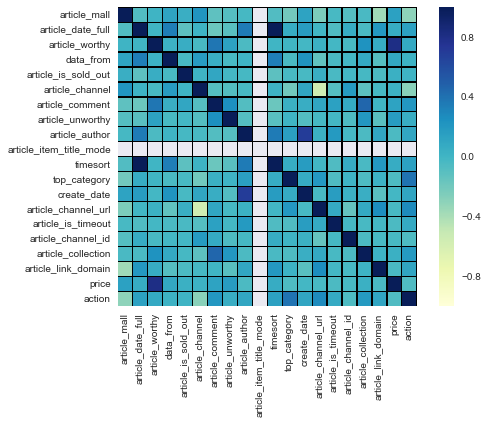

In [33]:
sb.heatmap(raw_data.corr(), linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=False)
sb.plt.show()

In [21]:
raw_data.drop(labels=['article_item_title_mode'], axis=1, inplace=True)

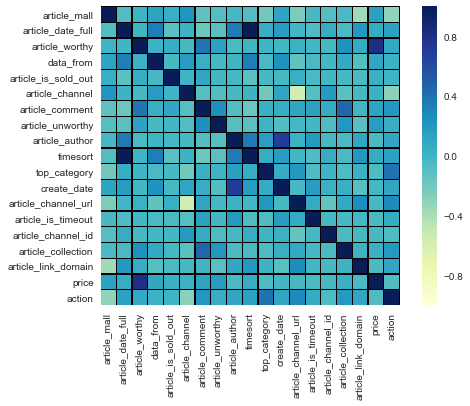

In [35]:
sb.heatmap(raw_data.corr(), linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=False)
sb.plt.show()

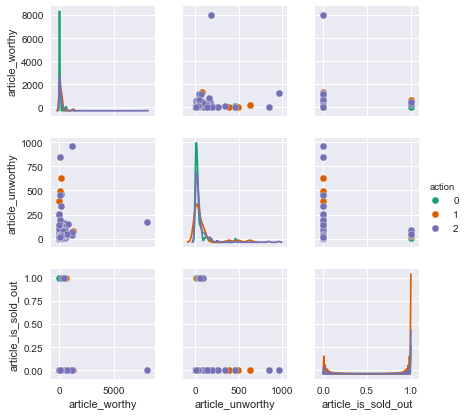

In [28]:
sb.pairplot(data=raw_data, vars=['article_worthy','article_unworthy','article_is_sold_out'], hue='action', palette='Dark2', diag_kind='kde', size=2, dropna=True)
sb.plt.show()

In [22]:
feature_matrix = raw_data.drop(['article_title', 'action'], axis=1)

sample_data = hstack((feature_matrix, title_feature_matrix))
sample_target = raw_data[['action']].as_matrix()
print(sample_data.shape, sample_target.shape)

(265, 178) (265, 1)


## build model

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(sample_data, sample_target, test_size=0.1, random_state=1)
# print X_train.shape, y_train.shape, X_test.shape, y_test.shape
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('acc: ', accuracy_score(y_test, pred))

acc:  0.888888888889


/Users/dd/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
clf = LogisticRegression()
print('cv score: ', cross_val_score(clf, sample_data, sample_target.reshape((-1,)), cv=10).mean())

cv score:  0.719201058201


In [26]:
clf = DecisionTreeClassifier(min_samples_split=15)
print('cv score: ', cross_val_score(clf, sample_data, sample_target.reshape((-1,)), cv=10).mean())

cv score:  0.639417989418


In [27]:
clf = SVC(kernel='rbf')
print('cv score: ', cross_val_score(clf, sample_data, sample_target.reshape((-1,)), cv=10).mean())

cv score:  0.668285714286


In [28]:
clf = GaussianNB()
print('cv score: ', cross_val_score(clf, sample_data, sample_target.reshape((-1,)), cv=10).mean())

cv score:  0.422576719577


In [29]:
clf = AdaBoostClassifier(n_estimators=15, learning_rate=0.5)
print('cv score: ', cross_val_score(clf, sample_data, sample_target.reshape((-1,)), cv=10).mean())

cv score:  0.704687830688


In [30]:
clf = GradientBoostingClassifier(n_estimators=15, learning_rate=0.5)
print('cv score: ', cross_val_score(clf, sample_data, sample_target.reshape((-1,)), cv=10).mean())

cv score:  0.684291005291


In [31]:
from sklearn.model_selection import RandomizedSearchCV
search_param = {'n_estimators': arange(1, 50, 1), 'learning_rate': arange(0.1, 10, 0.1)}
t_start = time()
clf = RandomizedSearchCV(AdaBoostClassifier(), search_param, cv=10, scoring='accuracy', n_iter=50, random_state=1, n_jobs=-1)
clf.fit(sample_data, sample_target.reshape(len(sample_target),))
print('search time: ', (time() - t_start))
print(clf.best_score_)
print(clf.best_estimator_)

search time:  10.511327981948853
0.743396226415
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.80000000000000004, n_estimators=7,
          random_state=None)


In [47]:
t_start = time()
search_param = {'n_estimators': range(1, 150, 1),
                'max_depth': [5], # range(1, 25, 1), 'min_samples_split': range(5, 50, 1),
                # 'min_samples_split': range(10, 50, 1), 'min_samples_leaf': range(10, 50, 1),
                # 'max_features': range(5, 50, 1),
                # 'learning_rate': arange(0.1, 10, 0.1)
                }
clf = RandomizedSearchCV(GradientBoostingClassifier(), search_param, cv=10, scoring='accuracy', n_iter=50, random_state=1, n_jobs=-1)
clf.fit(sample_data, sample_target.reshape(len(sample_target),))
print('search time: ', (time() - t_start))
print(clf.best_score_)
print(clf.best_estimator_)

search time:  84.05649900436401
0.777358490566
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=5, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
